In [1]:
import pandas as pd
from pandas import read_csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,train_test_split
import imblearn
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 
from sklearn.svm import SVC

In [2]:
SalaryTrain = pd.read_csv("C:\\Users\\siddh\\Downloads\\SalaryData_Train.csv")
SalaryTrain

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
SalaryTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [4]:
# From the above we can see that there are no Null-Values in the Train data set.
# A total of 30161 rows and 14 columns are there.

In [5]:
SalaryTest = pd.read_csv("C:\\Users\\siddh\\Downloads\\SalaryData_Test.csv")
SalaryTest

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [6]:
SalaryTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [7]:
# In the above Test Data set as well there are no Null values.
# A total of 15060 rows and 14 columns are there.

In [8]:
Duplicate_train = SalaryTrain.duplicated()
print('Duplicate rows: %d' % Duplicate_train.sum())

Duplicate rows: 3258


In [9]:
Duplicate_test = SalaryTest.duplicated()
print('Duplicate rows: %d' % Duplicate_test.sum())

Duplicate rows: 930


In [10]:
# Dropping the Duplicates of SalaryTrain dataset
print('Rows before removal of duplicates = %d' % SalaryTrain.shape[0])

SalaryTrain = SalaryTrain.drop_duplicates()
print('Rows after removal of duplicates = %d' % SalaryTrain.shape[0])

Rows before removal of duplicates = 30161
Rows after removal of duplicates = 26903


In [11]:
# Dropping the Duplicates of SalaryTest dataset
print('Rows before removal of duplicates = %d' % SalaryTest.shape[0])

SalaryTest = SalaryTest.drop_duplicates()
print('Rows after removal of duplicates = %d' % SalaryTest.shape[0])

Rows before removal of duplicates = 15060
Rows after removal of duplicates = 14130


In [12]:
# In the above two data sets there are few categorical variables.
# We'll convert categorical variable into numerical by using One-Hot Encoding & Label Encoding.
# The variable "education" is ordinal so we'll Use Label Encoding for that.
# For rest all the variables we'll use One-Hot Encoding Technique.

# Using Label Encoding for the variable "Education" ('SalaryTrain')

In [13]:
SalaryTrain['education'].value_counts()

 HS-grad         8268
 Some-college    5893
 Bachelors       4503
 Masters         1558
 Assoc-voc       1256
 Assoc-acdm       994
 11th             941
 10th             770
 7th-8th          541
 Prof-school      532
 9th              449
 Doctorate        364
 12th             358
 5th-6th          283
 1st-4th          149
 Preschool         44
Name: education, dtype: int64

In [14]:
label_encoder = preprocessing.LabelEncoder() 
 
SalaryTrain['education']= label_encoder.fit_transform(SalaryTrain['education']) 
  
SalaryTrain['education'].unique()

<ipython-input-14-908f7c48eb99>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SalaryTrain['education']= label_encoder.fit_transform(SalaryTrain['education'])


array([ 9, 11,  1, 12,  6, 15,  7,  5, 10,  8, 14,  4,  0, 13,  2,  3])

In [15]:
SalaryTrain.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,9,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,9,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,11,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,1,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,9,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Using One-Hot Encoding for rest of the objects in SalaryTrain Data

In [16]:
SalaryTrain['workclass'].value_counts()

 Private             19213
 Self-emp-not-inc     2431
 Local-gov            2014
 State-gov            1253
 Self-emp-inc         1049
 Federal-gov           929
 Without-pay            14
Name: workclass, dtype: int64

In [17]:
SalaryTrain = pd.get_dummies(SalaryTrain, columns=['workclass'])

In [18]:
SalaryTrain.head()

,age,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay
0,39,9,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,0,0,0,0,1,0
1,50,9,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0,0,0,1,0,0
2,38,11,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,0,1,0,0,0,0
3,53,1,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0,1,0,0,0,0
4,28,9,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,0,1,0,0,0,0


In [19]:
SalaryTrain['maritalstatus'].value_counts()

 Married-civ-spouse       12371
 Never-married             8387
 Divorced                  4009
 Separated                  928
 Widowed                    817
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64

In [20]:
SalaryTrain = pd.get_dummies(SalaryTrain, columns=['maritalstatus'])
SalaryTrain.head()

,age,education,educationno,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,...,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,maritalstatus_ Divorced,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Married-spouse-absent,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed
0,39,9,13,Adm-clerical,Not-in-family,White,Male,2174,0,40,...,0,1,0,0,0,0,0,1,0,0
1,50,9,13,Exec-managerial,Husband,White,Male,0,0,13,...,1,0,0,0,0,1,0,0,0,0
2,38,11,9,Handlers-cleaners,Not-in-family,White,Male,0,0,40,...,0,0,0,1,0,0,0,0,0,0
3,53,1,7,Handlers-cleaners,Husband,Black,Male,0,0,40,...,0,0,0,0,0,1,0,0,0,0
4,28,9,13,Prof-specialty,Wife,Black,Female,0,0,40,...,0,0,0,0,0,1,0,0,0,0


In [21]:
SalaryTrain['occupation'].value_counts()

 Prof-specialty       3783
 Exec-managerial      3646
 Adm-clerical         3291
 Craft-repair         3229
 Sales                3205
 Other-service        2914
 Machine-op-inspct    1665
 Transport-moving     1420
 Handlers-cleaners    1159
 Farming-fishing       957
 Tech-support          858
 Protective-serv       626
 Priv-house-serv       141
 Armed-Forces            9
Name: occupation, dtype: int64

In [22]:
SalaryTrain = pd.get_dummies(SalaryTrain, columns=['occupation'])
SalaryTrain.head()

,age,education,educationno,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,...,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving
0,39,9,13,Not-in-family,White,Male,2174,0,40,United-States,...,0,0,0,0,0,0,0,0,0,0
1,50,9,13,Husband,White,Male,0,0,13,United-States,...,0,0,0,0,0,0,0,0,0,0
2,38,11,9,Not-in-family,White,Male,0,0,40,United-States,...,0,1,0,0,0,0,0,0,0,0
3,53,1,7,Husband,Black,Male,0,0,40,United-States,...,0,1,0,0,0,0,0,0,0,0
4,28,9,13,Wife,Black,Female,0,0,40,Cuba,...,0,0,0,0,0,1,0,0,0,0


In [23]:
SalaryTrain['relationship'].value_counts()

 Husband           10809
 Not-in-family      7115
 Own-child          3655
 Unmarried          3086
 Wife               1366
 Other-relative      872
Name: relationship, dtype: int64

In [24]:
SalaryTrain = pd.get_dummies(SalaryTrain, columns=['relationship'])
SalaryTrain.head()

,age,education,educationno,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,...,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,39,9,13,White,Male,2174,0,40,United-States,<=50K,...,0,0,0,0,0,1,0,0,0,0
1,50,9,13,White,Male,0,0,13,United-States,<=50K,...,0,0,0,0,1,0,0,0,0,0
2,38,11,9,White,Male,0,0,40,United-States,<=50K,...,0,0,0,0,0,1,0,0,0,0
3,53,1,7,Black,Male,0,0,40,United-States,<=50K,...,0,0,0,0,1,0,0,0,0,0
4,28,9,13,Black,Female,0,0,40,Cuba,<=50K,...,0,0,0,0,0,0,0,0,0,1


In [25]:
SalaryTrain['race'].value_counts()

 White                 22758
 Black                  2734
 Asian-Pac-Islander      894
 Amer-Indian-Eskimo      286
 Other                   231
Name: race, dtype: int64

In [26]:
SalaryTrain = pd.get_dummies(SalaryTrain, columns=['race'])
SalaryTrain.head()

,age,education,educationno,sex,capitalgain,capitalloss,hoursperweek,native,Salary,workclass_ Federal-gov,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,39,9,13,Male,2174,0,40,United-States,<=50K,0,...,1,0,0,0,0,0,0,0,0,1
1,50,9,13,Male,0,0,13,United-States,<=50K,0,...,0,0,0,0,0,0,0,0,0,1
2,38,11,9,Male,0,0,40,United-States,<=50K,0,...,1,0,0,0,0,0,0,0,0,1
3,53,1,7,Male,0,0,40,United-States,<=50K,0,...,0,0,0,0,0,0,0,1,0,0
4,28,9,13,Female,0,0,40,Cuba,<=50K,0,...,0,0,0,0,1,0,0,1,0,0


In [27]:
SalaryTrain['sex'].value_counts()

 Male      17961
 Female     8942
Name: sex, dtype: int64

In [28]:
SalaryTrain = pd.get_dummies(SalaryTrain, columns=['sex'])
SalaryTrain.head()

,age,education,educationno,capitalgain,capitalloss,hoursperweek,native,Salary,workclass_ Federal-gov,workclass_ Local-gov,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,9,13,2174,0,40,United-States,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,9,13,0,0,13,United-States,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,11,9,0,0,40,United-States,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,1,7,0,0,40,United-States,<=50K,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,9,13,0,0,40,Cuba,<=50K,0,0,...,0,0,1,0,0,1,0,0,1,0


In [29]:
SalaryTrain['native'].value_counts()

 United-States                 24259
 Mexico                          600
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 El-Salvador                     100
 India                           100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 Italy                            68
 China                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        61
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [30]:
SalaryTrain = pd.get_dummies(SalaryTrain, columns=['native'])

In [31]:
SalaryTrain.head()

,age,education,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,9,13,2174,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,9,13,0,0,13,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,11,9,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,1,7,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,9,13,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [32]:
SalaryTrain['Salary'].value_counts()

 <=50K    20023
 >50K      6880
Name: Salary, dtype: int64

In [33]:
# From the above we saw that the salaries are not evenly distributed, thus it's a clear picture of imbalanced dataset

# Using Label Encoding for the variable "education" (SalaryTest)

In [34]:
SalaryTest['education'].value_counts()

 HS-grad         4473
 Some-college    3014
 Bachelors       2369
 Masters          864
 Assoc-voc        634
 11th             542
 Assoc-acdm       493
 10th             395
 7th-8th          265
 Prof-school      241
 9th              219
 12th             194
 Doctorate        168
 5th-6th          161
 1st-4th           71
 Preschool         27
Name: education, dtype: int64

In [35]:
SalaryTest['education']= label_encoder.fit_transform(SalaryTest['education']) 
  
SalaryTest['education'].unique()

<ipython-input-35-1aefe799b96e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SalaryTest['education']= label_encoder.fit_transform(SalaryTest['education'])


array([ 1, 11,  7, 15,  0, 14,  5,  9, 12,  4,  8,  6, 10,  2,  3, 13])

In [36]:
SalaryTest.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,1,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,11,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,7,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,15,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,0,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


# Using One-Hot Encoding for rest of the objects in SalaryTest Data

In [37]:
SalaryTest['workclass'].value_counts()

 Private             10138
 Self-emp-not-inc     1279
 Local-gov            1017
 State-gov             664
 Self-emp-inc          565
 Federal-gov           460
 Without-pay             7
Name: workclass, dtype: int64

In [38]:
SalaryTest = pd.get_dummies(SalaryTest, columns=['workclass'])
SalaryTest.head()

,age,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay
0,25,1,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0,0,1,0,0,0,0
1,38,11,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0,0,1,0,0,0,0
2,28,7,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0,1,0,0,0,0,0
3,44,15,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,0,0,1,0,0,0,0
4,34,0,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,0,0,1,0,0,0,0


In [39]:
SalaryTest['maritalstatus'].value_counts()

 Married-civ-spouse       6490
 Never-married            4501
 Divorced                 2026
 Separated                 470
 Widowed                   450
 Married-spouse-absent     182
 Married-AF-spouse          11
Name: maritalstatus, dtype: int64

In [40]:
SalaryTest = pd.get_dummies(SalaryTest, columns=['maritalstatus'])
SalaryTest.head()

,age,education,educationno,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,...,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,maritalstatus_ Divorced,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Married-spouse-absent,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed
0,25,1,7,Machine-op-inspct,Own-child,Black,Male,0,0,40,...,0,0,0,0,0,0,0,1,0,0
1,38,11,9,Farming-fishing,Husband,White,Male,0,0,50,...,0,0,0,0,0,1,0,0,0,0
2,28,7,12,Protective-serv,Husband,White,Male,0,0,40,...,0,0,0,0,0,1,0,0,0,0
3,44,15,10,Machine-op-inspct,Husband,Black,Male,7688,0,40,...,0,0,0,0,0,1,0,0,0,0
4,34,0,6,Other-service,Not-in-family,White,Male,0,0,30,...,0,0,0,0,0,0,0,1,0,0


In [41]:
SalaryTest['occupation'].value_counts()

 Prof-specialty       1899
 Exec-managerial      1897
 Craft-repair         1729
 Sales                1715
 Adm-clerical         1703
 Other-service        1513
 Machine-op-inspct     913
 Transport-moving      710
 Handlers-cleaners     648
 Tech-support          499
 Farming-fishing       484
 Protective-serv       326
 Priv-house-serv        89
 Armed-Forces            5
Name: occupation, dtype: int64

In [42]:
SalaryTest = pd.get_dummies(SalaryTest, columns=['occupation'])
SalaryTest.head()

,age,education,educationno,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,...,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving
0,25,1,7,Own-child,Black,Male,0,0,40,United-States,...,0,0,1,0,0,0,0,0,0,0
1,38,11,9,Husband,White,Male,0,0,50,United-States,...,1,0,0,0,0,0,0,0,0,0
2,28,7,12,Husband,White,Male,0,0,40,United-States,...,0,0,0,0,0,0,1,0,0,0
3,44,15,10,Husband,Black,Male,7688,0,40,United-States,...,0,0,1,0,0,0,0,0,0,0
4,34,0,6,Not-in-family,White,Male,0,0,30,United-States,...,0,0,0,1,0,0,0,0,0,0


In [43]:
SalaryTest['relationship'].value_counts()

 Husband           5714
 Not-in-family     3813
 Own-child         1928
 Unmarried         1543
 Wife               674
 Other-relative     458
Name: relationship, dtype: int64

In [44]:
SalaryTest = pd.get_dummies(SalaryTest, columns=['relationship'])
SalaryTest.head()

,age,education,educationno,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,...,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,25,1,7,Black,Male,0,0,40,United-States,<=50K,...,0,0,0,0,0,0,0,1,0,0
1,38,11,9,White,Male,0,0,50,United-States,<=50K,...,0,0,0,0,1,0,0,0,0,0
2,28,7,12,White,Male,0,0,40,United-States,>50K,...,1,0,0,0,1,0,0,0,0,0
3,44,15,10,Black,Male,7688,0,40,United-States,>50K,...,0,0,0,0,1,0,0,0,0,0
4,34,0,6,White,Male,0,0,30,United-States,<=50K,...,0,0,0,0,0,1,0,0,0,0


In [45]:
SalaryTest['race'].value_counts()

 White                 12051
 Black                  1400
 Asian-Pac-Islander      408
 Amer-Indian-Eskimo      149
 Other                   122
Name: race, dtype: int64

In [46]:
SalaryTest = pd.get_dummies(SalaryTest, columns=['race'])
SalaryTest.head()

,age,education,educationno,sex,capitalgain,capitalloss,hoursperweek,native,Salary,workclass_ Federal-gov,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,25,1,7,Male,0,0,40,United-States,<=50K,0,...,0,0,1,0,0,0,0,1,0,0
1,38,11,9,Male,0,0,50,United-States,<=50K,0,...,0,0,0,0,0,0,0,0,0,1
2,28,7,12,Male,0,0,40,United-States,>50K,0,...,0,0,0,0,0,0,0,0,0,1
3,44,15,10,Male,7688,0,40,United-States,>50K,0,...,0,0,0,0,0,0,0,1,0,0
4,34,0,6,Male,0,0,30,United-States,<=50K,0,...,1,0,0,0,0,0,0,0,0,1


In [47]:
SalaryTest['sex'].value_counts()

 Male      9455
 Female    4675
Name: sex, dtype: int64

In [48]:
SalaryTest = pd.get_dummies(SalaryTest, columns=['sex'])
SalaryTest.head()

,age,education,educationno,capitalgain,capitalloss,hoursperweek,native,Salary,workclass_ Federal-gov,workclass_ Local-gov,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,25,1,7,0,0,40,United-States,<=50K,0,0,...,1,0,0,0,0,1,0,0,0,1
1,38,11,9,0,0,50,United-States,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,1
2,28,7,12,0,0,40,United-States,>50K,0,1,...,0,0,0,0,0,0,0,1,0,1
3,44,15,10,7688,0,40,United-States,>50K,0,0,...,0,0,0,0,0,1,0,0,0,1
4,34,0,6,0,0,30,United-States,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,1


In [49]:
SalaryTest['native'].value_counts()

 United-States                 12859
 Mexico                          292
 Philippines                      95
 Puerto-Rico                      66
 Germany                          65
 Canada                           56
 India                            47
 El-Salvador                      47
 China                            45
 Cuba                             41
 England                          33
 Italy                            32
 Dominican-Republic               30
 South                            30
 Japan                            30
 Portugal                         28
 Haiti                            27
 Columbia                         26
 Poland                           25
 Guatemala                        23
 Jamaica                          23
 Greece                           20
 Vietnam                          19
 Ecuador                          16
 Nicaragua                        15
 Peru                             15
 Iran                             14
 

In [50]:
SalaryTest = pd.get_dummies(SalaryTest, columns=['native'])
SalaryTest.head()

,age,education,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,1,7,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,11,9,0,0,50,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,28,7,12,0,0,40,>50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,15,10,7688,0,40,>50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,34,0,6,0,0,30,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [51]:
SalaryTest['Salary'].value_counts()

 <=50K    10620
 >50K      3510
Name: Salary, dtype: int64

In [52]:
# From the above we saw that the salaries are not evenly distributed, thus it's a clear picture of imbalanced dataset

In [53]:
SalaryTrain.describe()

,age,education,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
count,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,...,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000
mean,39.049140,10.254135,10.144296,1215.443259,98.427499,41.164591,0.034531,0.074862,0.714158,0.038992,...,0.001264,0.004052,0.000409,0.002639,0.001561,0.000632,0.000669,0.901721,0.002379,0.000595
std,13.188825,3.864670,2.620154,7805.366384,425.493211,12.347051,0.182593,0.263173,0.451823,0.193579,...,0.035528,0.063524,0.020217,0.051305,0.039481,0.025130,0.025858,0.297697,0.048717,0.024380
min,17.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,9.000000,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.000000,11.000000,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,48.000000,12.000000,13.000000,0.000000,0.000000,45.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,90.000000,15.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
SalaryTest.describe()

,age,education,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
count,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000,...,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000
mean,39.155414,10.223355,10.120736,1185.899292,94.499646,41.073885,0.032555,0.071975,0.717481,0.039986,...,0.001982,0.004671,0.000637,0.002123,0.000920,0.000849,0.000566,0.910050,0.001345,0.000495
std,13.429544,3.866601,2.602557,7903.191981,417.955786,12.268036,0.177475,0.258455,0.450241,0.195933,...,0.044473,0.068187,0.025231,0.046030,0.030319,0.029131,0.023788,0.286121,0.036646,0.022253
min,17.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,9.000000,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.000000,11.000000,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,48.000000,12.000000,13.000000,0.000000,0.000000,45.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,90.000000,15.000000,16.000000,99999.000000,3770.000000,99.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
# OBJECTIVE: To predict the salary Class

<AxesSubplot:xlabel='Salary', ylabel='count'>

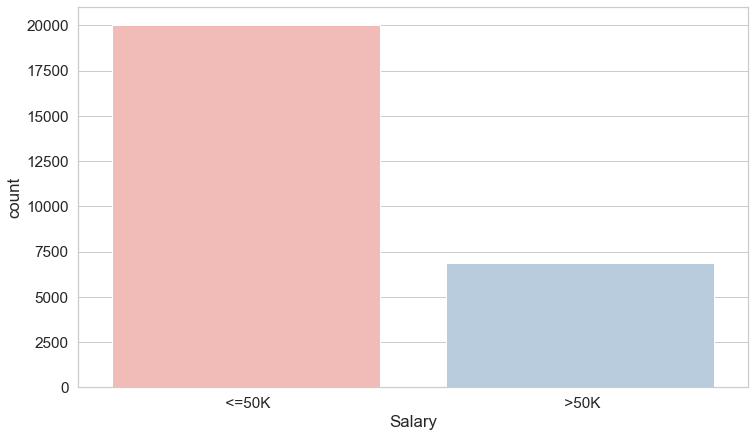

In [56]:
sns.set(style = 'whitegrid', font_scale = 1.4)
plt.subplots(figsize = (12,7))
sns.countplot(x = 'Salary', data = SalaryTrain, palette = 'Pastel1')

<AxesSubplot:xlabel='Salary', ylabel='count'>

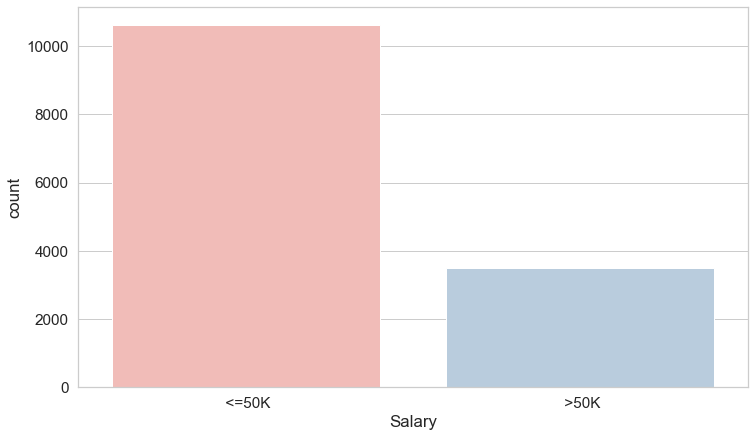

In [57]:
sns.set(style = 'whitegrid', font_scale = 1.4)
plt.subplots(figsize = (12,7))
sns.countplot(x = 'Salary', data = SalaryTest, palette = 'Pastel1')

In [58]:
# From the above two plots for Train and Test Datasets we concluded the difference in salary huge.

# DATA VISULAIZATION through Box-Plot Representation

C:\Users\siddh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

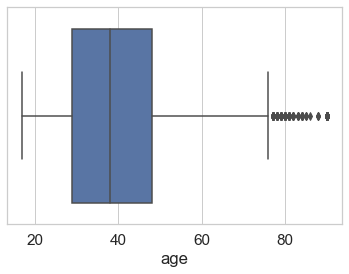

In [59]:
sns.boxplot(SalaryTrain['age'])

C:\Users\siddh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='educationno'>

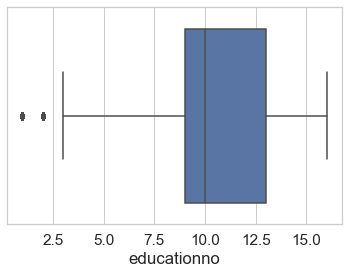

In [60]:
sns.boxplot(SalaryTrain['educationno'])

C:\Users\siddh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capitalgain'>

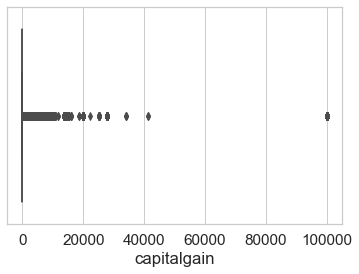

In [61]:
sns.boxplot(SalaryTrain['capitalgain'])

C:\Users\siddh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capitalloss'>

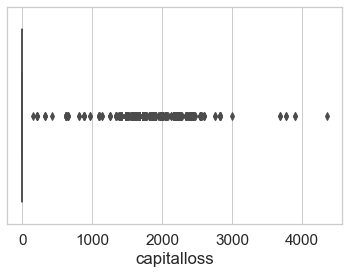

In [62]:
sns.boxplot(SalaryTrain['capitalloss'])

C:\Users\siddh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hoursperweek'>

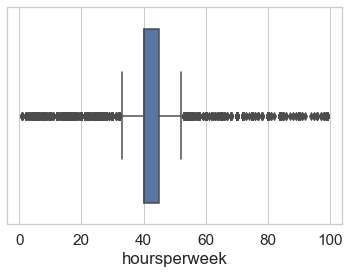

In [63]:
sns.boxplot(SalaryTrain['hoursperweek'])

In [64]:
# From the above boxplot representation we learnt that in each and every variable there are some outliers.

In [65]:
X_train = SalaryTrain.drop('Salary',axis=1)
X_train

,age,education,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,9,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,9,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,11,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,1,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,9,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,12,14,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30155,22,15,10,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30156,27,7,12,0,0,38,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30158,58,11,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [68]:
Y_train = SalaryTrain['Salary']
Y_train.shape

(26903,)

In [69]:
Y_train

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
30154      >50K
30155     <=50K
30156     <=50K
30158     <=50K
30160      >50K
Name: Salary, Length: 26903, dtype: object

In [70]:
X_test = SalaryTest.drop('Salary',axis=1)
X_test.shape

(14130, 87)

In [71]:
Y_test = SalaryTest['Salary']
Y_test.shape

(14130,)

In [72]:
X_test

,age,education,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,1,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38,11,9,0,0,50,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,28,7,12,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,15,10,7688,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,34,0,6,0,0,30,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,9,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
15056,39,9,13,0,0,36,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
15057,38,9,13,0,0,50,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
15058,44,9,13,5455,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [73]:
Y_test

0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
15055     <=50K
15056     <=50K
15057     <=50K
15058     <=50K
15059      >50K
Name: Salary, Length: 14130, dtype: object

# Using SVM to biuld Classification Model

# Support Vector Machine {SVM}

In [74]:
svm = SVC()
svm.fit(X_train, Y_train)
y_pred_svm = svm.predict(X_test)

y_pred_svm

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [75]:
print(accuracy_score(Y_test, y_pred_svm))

0.7960368011323425


In [76]:
y_pred_train_svm = svm.predict(X_train)

print(accuracy_score(Y_train, y_pred_train_svm))

0.7940378396461362


In [77]:
print(confusion_matrix(Y_test, y_pred_svm))

[[10257   363]
 [ 2519   991]]


In [78]:
print(classification_report(Y_test, y_pred_svm))

              precision    recall  f1-score   support

       <=50K       0.80      0.97      0.88     10620
        >50K       0.73      0.28      0.41      3510

    accuracy                           0.80     14130
   macro avg       0.77      0.62      0.64     14130
weighted avg       0.79      0.80      0.76     14130

